<a href="https://colab.research.google.com/github/jacmal/word_length_text_entropy_chars_probs/blob/main/Text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libs

In [2]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import string

# Data upload

In [3]:
#text upload
u_text = str(files.upload())
u_text = u_text.lower()
sample_text = u_text + 'zabcdefghijklmnopqrstuvwxyz'

Saving sample_text.txt to sample_text (2).txt


# Distribution of words length

In [4]:
def count_word_len(raw_text=sample_text):
  '''
  Take string variable and return 2 lists:
    1. list of words in text
    2. numpy vector of word lengths in the text
  '''
  #split text into words list
  words_list = raw_text.split()

  #create empty numpy vector counter for words length
  word_lengths = np.zeros(len(words_list))

  #counts chars of each word in words list and writes to counter vector
  for wordi in range(len(words_list)):
    word_lengths[wordi] = len(words_list[wordi])
  
  return words_list, word_lengths

In [5]:
#create word list and vector of words length
words, word_l = count_word_len()

In [6]:
#print sample of word list and counter vector
sample = int(input())
print('')
for i in zip(word_l[0:sample], words[0:sample]):
  print(i)

10

(19.0, "{'sample_text.txt':")
(15.0, "b'\\r\\n\\r\\nlorem")
(5.0, 'ipsum')
(5.0, 'dolor')
(3.0, 'sit')
(5.0, 'amet,')
(11.0, 'consectetur')
(10.0, 'adipiscing')
(5.0, 'elit.')
(2.0, 'ut')


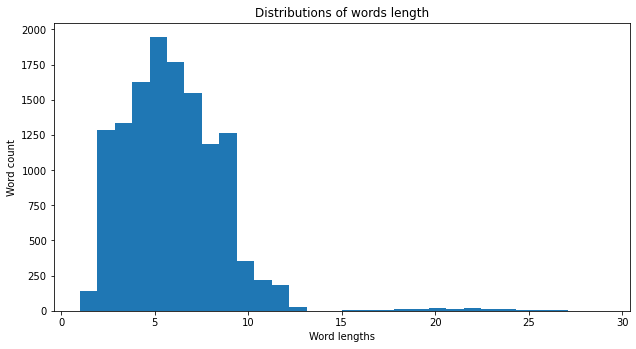

In [7]:
#create empty figure and set size
fig = plt.figure(figsize=(8,4))

#create histogram
ax = fig.add_axes([0,0,1,1])
ax.hist(word_l, bins=30)

#some descriptions
plt.xlabel('Word lengths')
plt.ylabel('Word count')
plt.title('Distributions of words length')

plt.show()

# Chars distributions and entropy of text

In [8]:
#create char list to count
letters = string.ascii_lowercase
print(letters)

abcdefghijklmnopqrstuvwxyz


In [9]:
#input for chars
#letters = str(input('Set chars to count: '))

In [10]:
def char_counter(raw_text=sample_text, char_list=letters):
  '''
  Take text and char string variable and return:
    1. numpy vector of counted chars
  '''
  #letter counter initialization
  letter_counter = np.zeros(len(char_list))
  
  #counts characters in a given text
  n = 0
  for i in char_list:
    letter_counter[n] = raw_text.lower().count(i)
    n += 1

  return letter_counter

In [11]:
#create vector of counted chars
letter_counter = char_counter(sample_text, letters)

In [12]:
#count probability for each letter in given text
letter_prob = letter_counter / sum(letter_counter)

In [13]:
#count entropy of chars in given text
entropy = -sum(letter_prob * np.log2(letter_prob))

In [14]:
x = range(len(letters)) #creating a list for char index
y = letter_counter      #number of occurrences of a given character

In [15]:
type(letter_counter)

numpy.ndarray

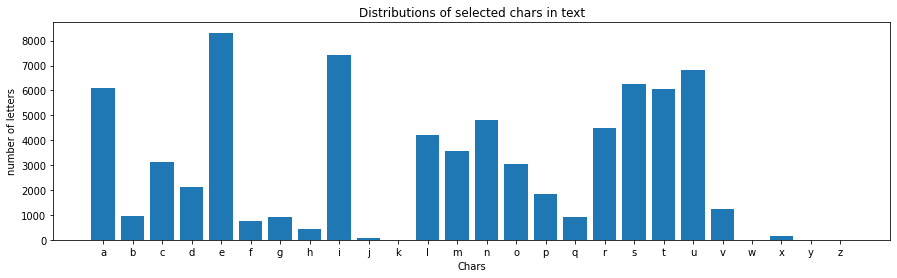

In [16]:
#create histogram of chars distributions
fig, ax = plt.subplots(1, figsize=(15, 4))

ax.bar(x, y)
ax.set_xticks(x)
ax.set_xticklabels(letters)

plt.title('Distributions of selected chars in text')
plt.xlabel('Chars')
plt.ylabel('number of letters')
plt.show()

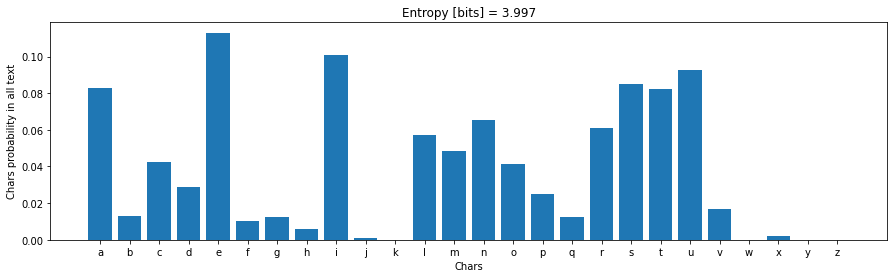

In [17]:
#create histogram of chars probability
fig, ax = plt.subplots(1, figsize=(15, 4))

ax.bar(x, letter_prob)
ax.set_xticks(x)
ax.set_xticklabels(letters)
ax.set_title('Entropy [bits] = %.3f'%entropy)

plt.xlabel('Chars')
plt.ylabel('Chars probability in all text')
plt.show()

## Conditional entropy (chars sequence entropy)

In [18]:
def chars_sequence_counter(chars_list=letters, raw_text=sample_text):
  '''
  Take char string variable, text and return:
    1. numpy matrix of counted chars sequence
  '''
  #create size for matrix
  num_letters = int(len(chars_list))
  #init count matrix for char sequence 
  prob_matrix = np.zeros((num_letters, num_letters))

  #checks the current character in the text and counts the occurrence of the next character
  for i in range(len(raw_text)-1):
    current_letter = raw_text[i]  #current char
    next_letter = raw_text[i+1]   #next char
    if current_letter in chars_list and next_letter in chars_list:
      prob_matrix[chars_list.index(current_letter), chars_list.index(next_letter)] += 1
  
  return prob_matrix

In [19]:
sequence_matrix = chars_sequence_counter(letters, sample_text)

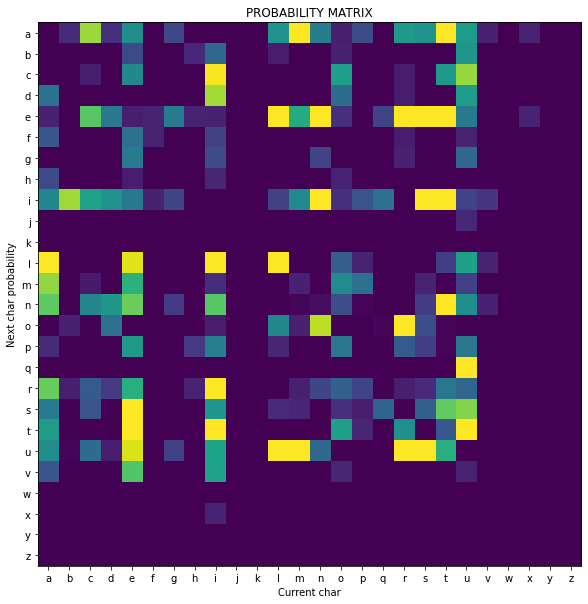

In [20]:
#create probability matrix
fig, ax = plt.subplots(1, figsize=(10,10))

ax.imshow(sequence_matrix, vmax=700)
ax.set_ylabel('Next char probability')
ax.set_xlabel('Current char')

ax.set_xticks(range(int(len(letters))))
ax.set_yticks(range(int(len(letters))))
ax.set_xticklabels(letters)
ax.set_yticklabels(letters)

plt.title('PROBABILITY MATRIX')
plt.show()

In [21]:
#init numpy vector for conditional char entrpy
conditional_entrpy = np.zeros(int(len(letters)))

#count conditional char entropy
for i in range(int(len(letters))):
  probs = sequence_matrix[i,:]
  probs = probs / sum(probs)
  conditional_entrpy[i] = -sum(probs * np.log2(probs + np.finfo(float).eps))

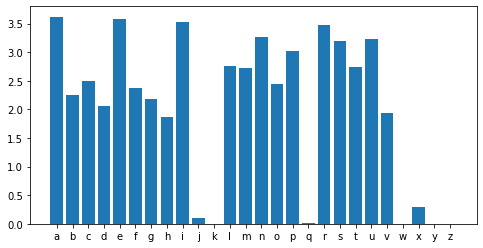

In [22]:
#create histogram of conditional char entropy
fig, ax = plt.subplots(1, figsize=(8, 4))

ax.bar(range(int(len(letters))), conditional_entrpy)
ax.set_xticks(range(int(len(letters))))
ax.set_xticklabels(letters)

plt.show()

# Statistics of the analyzed text

In [23]:
print('Entropy: {:.4f} [bits]'.format(entropy))
print(' _________________________________')
print('|     |             | conditional |')
print('|char | probability |    entropy  |')
print('|_____|_____________|_____________|')
for i, letter in enumerate(letters):
  print("|  {}  |  {:.4f}%       {:.4f}".format(letter, letter_prob[i]*100, conditional_entrpy[i]))
print('|_________________________________')

Entropy: 3.9972 [bits]
 _________________________________
|     |             | conditional |
|char | probability |    entropy  |
|_____|_____________|_____________|
|  a  |  8.2987%       3.6188
|  b  |  1.2973%       2.2591
|  c  |  4.2492%       2.4904
|  d  |  2.9003%       2.0584
|  e  |  11.2981%       3.5740
|  f  |  1.0460%       2.3677
|  g  |  1.2240%       2.1894
|  h  |  0.5814%       1.8684
|  i  |  10.0565%       3.5250
|  j  |  0.1087%       0.0969
|  k  |  0.0014%       -0.0000
|  l  |  5.7340%       2.7513
|  m  |  4.8469%       2.7243
|  n  |  6.5219%       3.2721
|  o  |  4.1392%       2.4437
|  p  |  2.4982%       3.0181
|  q  |  1.2606%       0.0122
|  r  |  6.0804%       3.4734
|  s  |  8.4848%       3.1954
|  t  |  8.2240%       2.7329
|  u  |  9.2754%       3.2246
|  v  |  1.6804%       1.9380
|  w  |  0.0014%       -0.0000
|  x  |  0.1875%       0.2881
|  y  |  0.0014%       -0.0000
|  z  |  0.0027%       -0.0000
|_________________________________


# Make a random word cloud

<class 'wordcloud.wordcloud.WordCloud'>


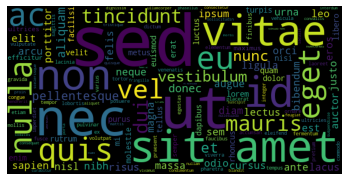

In [24]:
from wordcloud import WordCloud
word_cloud_width = 600
word_cloud_height = 300

wordcloud = WordCloud(width=word_cloud_width, height=word_cloud_height, relative_scaling=True).generate(sample_text)
print(type(wordcloud))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()